In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import mpld3
import matplotlib.pyplot as plt
# Set up useful plot dimensions and scroll enable #
plt.rcParams["figure.figsize"] = [12, 7]
mpld3.enable_notebook()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Parse through the file, and create a pandas DataFrame database style table to hold all event information

In [7]:
from src import transform 
from src import read_log_file as readlog
# filename = ""
filename = "datasets/g1_long"
database_table = readlog.get_parsed_data_from_file(filename)


     DateTime TimeFromStart_seconds EventType EventName  \
0        None                 0.416     Pause     Young   
1        None                 0.471     Pause     Young   
2        None                 0.664     Pause     Young   
3        None                 1.326     Pause     Young   
4        None                 1.837     Pause     Young   
...       ...                   ...       ...       ...   
1114     None              3753.860     Pause     Young   
1115     None              3754.671     Pause     Young   
1116     None              3755.633     Pause     Young   
1117     None              3756.931     Pause     Young   
1118     None              3759.153     Pause     Young   

                  AdditionalEventInfo        MemoryChange_MB  \
0     (Normal) (G1 Evacuation Pause)         55M->14M(1040M)   
1     (Normal) (G1 Evacuation Pause)         54M->15M(1040M)   
2     (Normal) (G1 Evacuation Pause)        167M->17M(1040M)   
3     (Normal) (G1 Evacuation Pause

In [150]:
# Access data from a particular log
log = "datasets/demo_data/demo_shenandoah.log"
data = search.getParsedData(log)
data = transform.getPausesData(data)
print(data)
#data = transform.getConcurrentData(data)
seperate_lists = transform.seperateEventName(data)
    
# for item in seperate_lists:
#     print(item)
#     print("\n\n\n")

     DateTime TimeFromStart_seconds EventType          EventName  \
1        None                 0.742     Pause          Init Mark   
3        None                 0.752     Pause         Final Mark   
10       None                 0.758     Pause   Init Update Refs   
13       None                 0.763     Pause  Final Update Refs   
16       None                 1.178     Pause          Init Mark   
...       ...                   ...       ...                ...   
6135     None               384.912     Pause  Final Update Refs   
6138     None               518.488     Pause          Init Mark   
6140     None               519.024     Pause         Final Mark   
6147     None               519.042     Pause   Init Update Refs   
6150     None               519.150     Pause  Final Update Refs   

     AdditionalEventInfo MemoryChange_MB Duration_miliseconds  
1      (unload classes)             None                0.785  
3      (unload classes)             None               

[25.349, 110.217, 168.548, 275.393, 305.533, 2.479, 194.632, 67.62, 362.238, 295.536, 363.384, 147.066, 34.445, 276.968, 266.455, 182.918, 307.611, 169.216, 357.436, 69.759, 59.151, 152.762, 242.233, 308.354, 356.184, 106.62, 12.221, 196.836, 4.512, 277.665, 19.483, 15.429, 229.03, 230.194, 196.154, 358.583, 267.1, 46.781, 153.504, 306.276, 276.154, 68.365, 12.775, 360.985, 164.964, 158.536, 183.676, 195.377, 3.957, 359.839, 306.93, 135.372, 108.977, 45.317, 294.873, 27.328, 69.032, 13.299, 22.096, 300.598, 63.37, 51.186, 189.46, 297.744, 157.1, 1.189, 380.192, 119.838, 35.837, 186.543, 382.654, 269.355, 190.218, 13.833, 379.037, 43.178, 235.031, 64.027, 155.668, 272.325, 20.772, 128.224, 376.589, 301.26, 167.083, 271.517, 46.066, 188.029, 299.101, 519.025, 14.378, 61.924, 0.753, 237.442, 270.825, 36.584, 187.268, 166.432, 238.599, 384.801, 156.353, 298.399, 122.192, 188.72, 62.628, 21.429, 270.168, 299.849, 383.794, 61.258, 236.186, 26.01, 301.947, 190.892, 165.681, 66.216, 2.068, 157

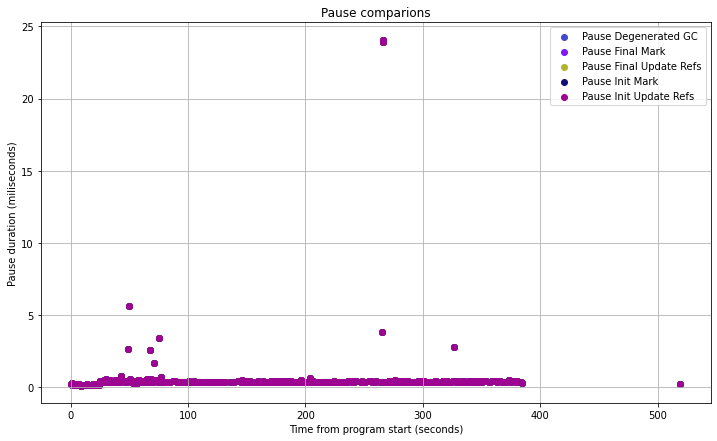

In [149]:
# Using the seperate lists, plot pauses in miliseconds
xdata = []
ydata = []
for i in range(len(seperate_lists)):
    x = list(map(float, x))
    y = list(map(float, y))
    xdata.append(x)
    ydata.append(y)
eventtype = seperate_lists[0]["EventType"].iloc[0]
labels = [seperate_lists[i]["EventType"].iloc[0] + " " + seperate_lists[i]["EventName"].iloc[0] for i in range(len(seperate_lists))]
graph = uplt.comparrison_scatter(xdata, ydata, None, None, labels)
graph = graph.set_title(eventtype + " comparions")

In [147]:
short_labels = list(label[10:] for label in labels)
uplt.compare_pauses_percentiles(ydata, labels=short_labels)


Percentiles| 50%       | 75%       | 90%       | 95%       | 99%       | 99.9%     | 99.99%    | 
------------------------------------------------------------------------------------------------
nerated GC | 0.38 ms   | 0.402 ms  | 0.442 ms  | 0.494 ms  | 3.395 ms  | 24.025 ms | 24.082 ms | 
l Mark     | 0.38 ms   | 0.402 ms  | 0.442 ms  | 0.494 ms  | 3.395 ms  | 24.025 ms | 24.082 ms | 
l Update R | 0.38 ms   | 0.402 ms  | 0.442 ms  | 0.494 ms  | 3.395 ms  | 24.025 ms | 24.082 ms | 
 Mark      | 0.38 ms   | 0.402 ms  | 0.442 ms  | 0.494 ms  | 3.395 ms  | 24.025 ms | 24.082 ms | 
 Update Re | 0.38 ms   | 0.402 ms  | 0.442 ms  | 0.494 ms  | 3.395 ms  | 24.025 ms | 24.082 ms | 


In [117]:
uplt.compare_trends(ydata, labels=short_labels)

 Trends (ms)  |  Total Pauses |  Max pause    |  Sum pauses   |  Mean pauses  | 
--------------------------------------------------------------------------------
 class unload | 408           | 13.351        | 324.433       | 0.7952        | 
 cleanup      | 812           | 1.523         | 133.236       | 0.1641        | 
 evacuation   | 408           | 24.045        | 1931.639      | 4.7344        | 
 marking      | 418           | 605.095       | 206166.73     | 493.2218      | 
 reset        | 418           | 35.737        | 560.512       | 1.3409        | 
 strong roots | 408           | 0.283         | 30.361        | 0.0744        | 
 update refer | 408           | 147.797       | 38375.903     | 94.0586       | 
 update threa | 404           | 26.563        | 5785.141      | 14.3197       | 
 weak referen | 408           | 22.352        | 108.428       | 0.2658        | 
 weak roots   | 408           | 24.088        | 218.018       | 0.5344        | 


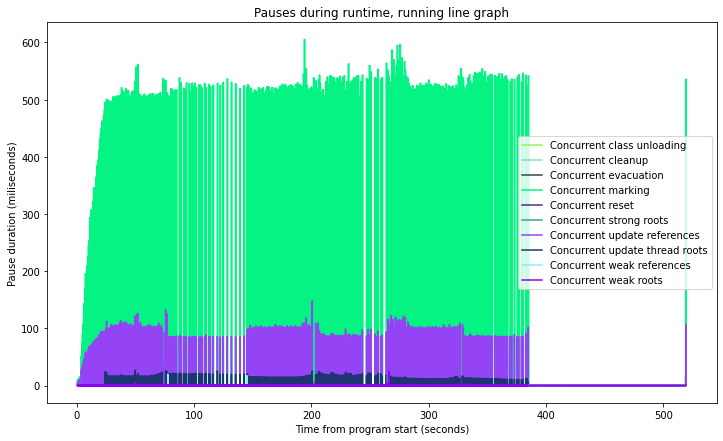

In [121]:
_= uplt.compare_paused_running_line(xdata, ydata, labels=labels)

In [140]:
def confirm_difference(lists):
    [print(len(lists[i])) for i in range(len(lists))]
confirm_difference(ydata)
confirm_difference(xdata)

408
408
408
408
408
408
408
408
408
408
408
408
408
408
408
408
408
408
408
408
408
408
408
408
408
408
408
408
408
408
